# PCA

In [12]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

In [13]:
def show(im):
    plt.imshow(im.reshape(28, 28))

In [38]:
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()
Xtrain = Xtrain.reshape(60000, 28**2)
Xtest = Xtest.reshape(10000, 28**2)
Xtrain.shape, ytrain.shape

((60000, 784), (60000,))

### 0. Scale the Data

Scale to a mean of zero because PCA needs that anyway.

In [41]:
Xtrain_sc = (Xtrain-Xtrain.mean()) / 255.0
Xtrain_sc.mean()

-9.292793292240034e-18

In [42]:
Xtest_sc = (Xtest - Xtrain.mean()) / 255.0 # <-- has to be Xtrain
Xtest_sc.mean()

0.0018541295684940551

In [20]:
ytrain[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### 1. LogReg Model

In [17]:
from sklearn.linear_model import LogisticRegression

In [47]:
m = LogisticRegression(C=0.001)  # does multiclass classification (10 models!)
m.fit(Xtrain_sc, ytrain)
m.score(Xtrain_sc, ytrain)

0.89455

In [48]:
m.score(Xtest_sc, ytest)

0.9001

### 2. PCA

In [51]:
from sklearn.decomposition import PCA  # dimensionality reduction

In [59]:
pca = PCA(n_components=50)  # M'
pca.fit(Xtrain_sc)         # no y because it is unsupervised
Z = pca.transform(Xtrain_sc)
Z.shape

(60000, 50)

#### Features are really independent:

In [62]:
import pandas as pd

pd.DataFrame(Z).corr().round(3)
None # <-- Python trick :-)

### Run LogReg again

In [66]:
m2 = LogisticRegression(C=0.01)
m2.fit(Z, ytrain)  # train with fewer features now
m2.score(Z, ytrain)

0.9032833333333333

In [67]:
Ztest = pca.transform(Xtest_sc)  # does the dot product
m2.score(Ztest, ytest)

0.9093

### How many components do I need?

In [68]:
A = pca.components_
A.shape

(50, 784)

Text(0.5, 0, 'number of principal components')

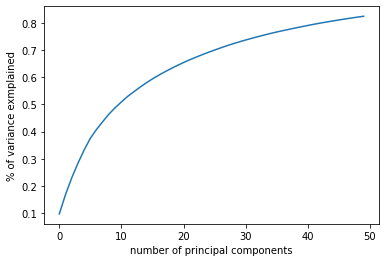

In [73]:
# how much of the variance in the data is explained by the P.C.s?
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.ylabel("% of variance exmplained")
plt.xlabel("number of principal components")

### Fun Fact: component of MNIST can be visualized

In [75]:
A = pca.components_
B = A.reshape(50, 28, 28)

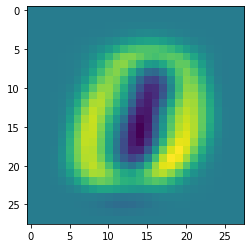

In [76]:
show(B[0])

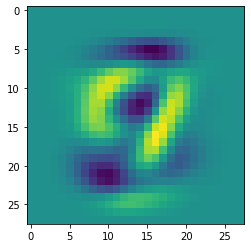

In [80]:
show(B[1])

In [81]:
Xre = pca.inverse_transform(Z)

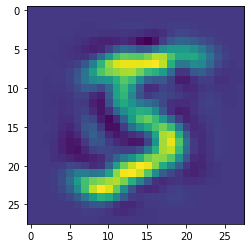

In [82]:
show(Xre[0]) # reconstructed image

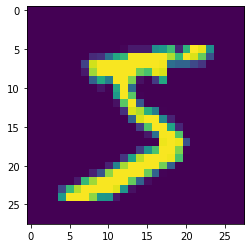

In [83]:
show(X[0])

## Pingus

In [84]:
df = pd.read_csv('ds_teaching_material/data/penguins_simple.csv', sep=';')

In [87]:
pingu = df.iloc[:, 1:-1]

In [93]:
pingupca = PCA(n_components=3)
ZPing = pingupca.fit_transform(pingu - pingu.mean())

In [94]:
Aping = pingupca.components_
Aping.shape

(3, 4)

In [96]:
df = pd.DataFrame(Aping, index=['pca1', 'pca2', 'pca3'], columns=pingu.columns)
df

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
pca1,0.004003,-0.001154,0.015195,0.999876
pca2,-0.319278,0.086848,-0.943542,0.015717
pca3,0.941265,0.144495,-0.305190,0.001036


<AxesSubplot:>

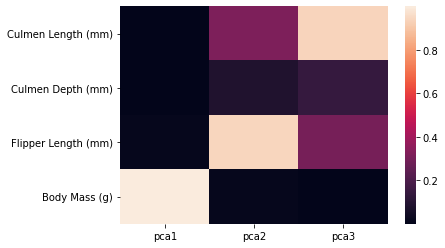

In [99]:
import seaborn as sns
sns.heatmap(df.T.abs())